For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import export_text
from sklearn.metrics import roc_curve, roc_auc_score
from logistic_regression import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV


## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [ ]:
lr = LinearRegression()
X = data['Net_Activity'].values.reshape(-1, 1)
y = data['Energy']

# Split data i 80% trening og 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

mse = np.mean((predictions - y_test) ** 2)
print(f'MSE: {mse:.4f}')
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print(f'RMSE: {rmse:.4f}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(lr.losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

print(f'Initial loss: {lr.losses[0]:.4f}')
print(f'Final loss: {lr.losses[-1]:.4f}')
print(f'Loss reduction: {((lr.losses[0] - lr.losses[-1]) / lr.losses[0] * 100):.2f}%')

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [ ]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [ ]:
X_train = train.iloc[:, 0:2].values
y_train = train.iloc[:, 2].values

X_test = test.iloc[:, 0:2].values
y_test = test.iloc[:, 2].values


In [ ]:
# Featuer engineering
X_train_eng = np.column_stack([
    X_train,
    X_train[:, 0]**2,
    X_train[:, 1]**2,
    X_train[:, 0] * X_train[:, 1]
])

X_test_eng = np.column_stack([
    X_test,  
    X_test[:, 0] ** 2,  
    X_test[:, 1] ** 2,  
    X_test[:, 0] * X_test[:, 1],  
])

In [ ]:
lr = LogisticRegression(learning_rate=0.001, epochs=10000)
lr.fit(X_train_eng, y_train)
predictions = lr.predict(X_test_eng)
accuracy = np.mean(predictions == y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Filtrer data basert på target klasse
class_0 = data[data['y'] == 0]
class_1 = data[data['y'] == 1]

# Plot begge klasser med forskjellige farger
ax.scatter(class_0['x0'], class_0['x1'], class_0['y'], 
          c='red', marker='o', s=50, alpha=0.7, label='Class 0')
ax.scatter(class_1['x0'], class_1['x1'], class_1['y'], 
          c='blue', marker='^', s=50, alpha=0.7, label='Class 1')

ax.set_xlabel('X0 (Signal 1)', fontsize=12)
ax.set_ylabel('X1 (Signal 2)', fontsize=12)
ax.set_zlabel('Y (Target)', fontsize=12)
ax.set_title('3D Visualization of Mission 2 Data\n(SkyNet Signal Classification)', fontsize=14)
ax.legend()

# Legg til en 2D-visning også for bedre forståelse
plt.figure(figsize=(10, 6))
plt.scatter(class_0['x0'], class_0['x1'], c='red', marker='o', s=50, alpha=0.7, label='Class 0')
plt.scatter(class_1['x0'], class_1['x1'], c='blue', marker='^', s=50, alpha=0.7, label='Class 1')
plt.xlabel('X0 (Signal 1)', fontsize=12)
plt.ylabel('X1 (Signal 2)', fontsize=12)
plt.title('2D View: SkyNet Signal Classification Data', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
regressor = tree.DecisionTreeRegressor().fit(X_train_eng, y_train)
y_pred = regressor.predict(X_test_eng)
accuracy = np.mean(y_test == y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [186]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train['data_stream_3'] = (train['data_stream_3'] * 1000 + 1) % 2
test['data_stream_3'] = (test['data_stream_3'] * 1000 + 1) % 2

In [187]:
X_train = train.iloc[:, 0:11].values
y_train = train.iloc[:, 11].values

X_test = test.iloc[:, 0:11].values
y_test = test.iloc[:, 11].values

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=1)
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_test == y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
param_grid = {
    'max_depth': [2, 4, 6, 10, 25, 100, None],
    'min_samples_split': [2, 5, 10, 20, 50],  
    'min_samples_leaf': [1, 2, 5, 10, 20, 50],
    'criterion': ['gini', 'entropy', 'log_loss']
}

clf = tree.DecisionTreeClassifier(random_state=42)
gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1)
gridSearch.fit(X_train, y_train)
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_

print(f"Best parameters found: {bestParams}")
print(f"Best CV score: {bestScore:.4f}")
print("-" * 50)

Fitting 10 folds for each of 630 candidates, totalling 6300 fits


In [ ]:
a = (test["target"] == 1).sum()
b = (test["target"] == 0).sum()
n = len(test)
print(a)
print(b)
print(a/n)
print(b/n)


In [ ]:

majority = train[train["target"] == 0]
minority = train[train["target"] == 1]

majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=42
)

balanced = pd.concat([minority, majority_downsampled])

In [ ]:
X_train = balanced.iloc[:, 0:11].values
y_train = balanced.iloc[:, 11].values

X_test = test.iloc[:, 0:11].values
y_test = test.iloc[:, 11].values

clf = tree.DecisionTreeClassifier(random_state=42, max_depth=1)
model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_test == y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

In [184]:
best_overall_model = None
best_overall_score = 0
best_overall_feature = None
best_overall_params = None

param_grid = {
    'max_depth': [2, 4, 6, 10, 25, 100, None],
    'min_samples_split': [2, 5, 10, 20, 50],  
    'min_samples_leaf': [1, 2, 5, 10, 20, 50],
    'criterion': ['gini', 'entropy', 'log_loss']
}

for feature in balanced.columns[:-1]:
    X_train = train[[feature]]
    y_train = train["target"]

    X_test = test[[feature]]
    y_test = test["target"]

    clf = tree.DecisionTreeClassifier(random_state=42)
    gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1, verbose=1)
    gridSearch.fit(X_train, y_train)
    bestParams = gridSearch.best_params_
    bestScore = gridSearch.best_score_

    print(f"Feature: {feature}")
    print(f"Best parameters found: {bestParams}")
    print(f"Best CV score: {bestScore:.4f}")
    print("-" * 50)

    if bestScore > best_overall_score:
        best_overall_score = bestScore
        best_overall_model = gridSearch.best_estimator_
        best_overall_feature = feature
        best_overall_params = bestParams

print(f"\n=== BESTE MODELL TOTALT ===")
print(f"Best feature: {best_overall_feature}")
print(f"Best overall CV score: {best_overall_score:.4f}")
print(f"Best overall params: {best_overall_params}")

# Test den beste modellen
X_test_best = test[[best_overall_feature]]
y_pred_proba_best = best_overall_model.predict_proba(X_test_best)[:, 1]
test_auc = roc_auc_score(test["target"], y_pred_proba_best)
print(f"Test AUC with best model: {test_auc:.4f}")

Fitting 10 folds for each of 630 candidates, totalling 6300 fits
Feature: data_stream_0
Best parameters found: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.5669
--------------------------------------------------
Fitting 10 folds for each of 630 candidates, totalling 6300 fits
Feature: data_stream_1
Best parameters found: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best CV score: 0.5181
--------------------------------------------------
Fitting 10 folds for each of 630 candidates, totalling 6300 fits
Feature: data_stream_2
Best parameters found: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV score: 0.4987
--------------------------------------------------
Fitting 10 folds for each of 630 candidates, totalling 6300 fits
Feature: data_stream_3
Best parameters found: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split'

In [ ]:
feature = "data_stream_3"
X_train = balanced[[feature]]       
y_train = balanced["target"]

X_test = test[[feature]]
y_test = test["target"]

clf = tree.DecisionTreeClassifier(random_state=42, max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = np.mean(y_test == y_pred)
print(f"Accuracy feature {feature}: {acc*100:.2f}%")

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,6))
tree.plot_tree(clf, feature_names=feature_names, class_names=["0","1"], filled=True)
plt.show()

print(export_text(clf, feature_names=feature_names, class_names=["0","1"]))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"ROC AUC Score: {auc_score:.3f}")

[[1594   20]
 [ 358   28]]
Accuracy: 0.811
ROC AUC Score: 0.72


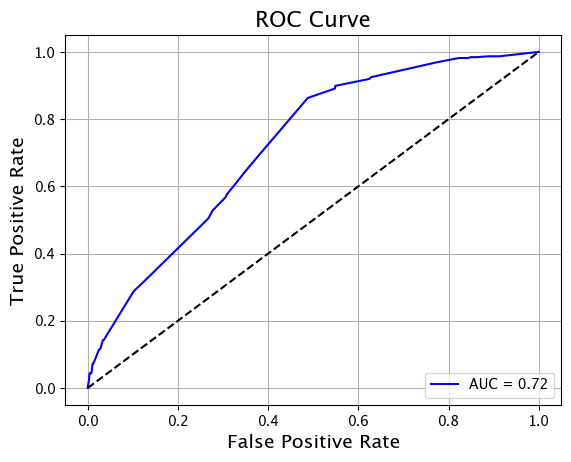

In [181]:
# Critical communication needs to be more important in dataset. 
# I need to over- or under- sample the data
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Modify data to fit the model correctly
train['data_stream_3'] = (train['data_stream_3'] * 1000 + 1) % 2
test['data_stream_3'] = (test['data_stream_3'] * 1000 + 1) % 2

# Check the ratio between the majority and minority
ratioMajMin = train['target'].sum() / len(train['target'])
# print(ratioMajMin)

def accuracy(trueValues, predictions):
    return np.mean(trueValues == predictions)


### Over- and Undersampling

majorityClass = 0
minorityClass = 1

trainMajority = train[train['target'] == majorityClass]
trainMinority = train[train['target'] == minorityClass]
nSamplesNeeded = len(trainMajority) - len(trainMinority)

# Undersampling
trainMajorityUndersampled = trainMajority.sample(n=len(trainMinority), random_state=43)
trainBalancedUndersampled = pd.concat([trainMinority, trainMajorityUndersampled])

# Oversampling
trainMinorityOversampled = trainMinority.sample(n=nSamplesNeeded, replace=True, random_state=42)
trainBalancedOversampled = pd.concat([trainMajority, trainMinorityOversampled])

### End over-under-sampling

# Functions to test ROC-curve
y_train = train['target']
X_train = train.drop(columns=['target'])
y_test = test['target']
X_test = test.drop(columns=['target'])


'''
param_grid = {
    'max_depth': [5,10,25,None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

clf = tree.DecisionTreeClassifier(random_state=42)
gridSearch = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=1, verbose=1)
gridSearch.fit(X_train, y_train)
bestParams = gridSearch.best_params_
bestScore = gridSearch.best_score_
print(f"Best parameters found: {bestParams}")
print(gridSearch.cv_results_)
best_model = gridSearch.best_score_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC for the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {roc_auc:.2f}")
print(f"Best ROC-auc Score: {bestScore}")

'''

# After doing a grid search CV i found 
# Best parameters found: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=6, 
                                  min_samples_leaf=2, 
                                  min_samples_split=2,
                                  random_state=50, 
                                  )

clf.fit(X_train, y_train)
clfPred = clf.predict(X_test)

cm = confusion_matrix(y_test, clfPred)
print(cm)

print(f'Accuracy: {accuracy(y_test, clfPred)}')

prob_predictions = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions, pos_label=1)
auc = round(metrics.roc_auc_score(y_test, prob_predictions), 2)
print(f'ROC AUC Score: {auc}')

# cross_val_auc = cross_val_score(clf, X_test, y_test, cv=5, scoring='roc_auc')
# print(f'Cross-validated AUC: {round(cross_val_auc.mean(), 2)}')

#tree.plot_tree(clf)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()



## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [ ]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [ ]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

In [ ]:
# 3D plot av mission 2 data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Filtrer data basert på target klasse
class_0 = data[data['y'] == 0]
class_1 = data[data['y'] == 1]

# Plot begge klasser med forskjellige farger
ax.scatter(class_0['x0'], class_0['x1'], class_0['y'], 
          c='red', marker='o', s=50, alpha=0.7, label='Class 0')
ax.scatter(class_1['x0'], class_1['x1'], class_1['y'], 
          c='blue', marker='^', s=50, alpha=0.7, label='Class 1')

ax.set_xlabel('X0 (Signal 1)', fontsize=12)
ax.set_ylabel('X1 (Signal 2)', fontsize=12)
ax.set_zlabel('Y (Target)', fontsize=12)
ax.set_title('3D Visualization of Mission 2 Data\n(SkyNet Signal Classification)', fontsize=14)
ax.legend()

# Legg til en 2D-visning også for bedre forståelse
plt.figure(figsize=(10, 6))
plt.scatter(class_0['x0'], class_0['x1'], c='red', marker='o', s=50, alpha=0.7, label='Class 0')
plt.scatter(class_1['x0'], class_1['x1'], c='blue', marker='^', s=50, alpha=0.7, label='Class 1')
plt.xlabel('X0 (Signal 1)', fontsize=12)
plt.ylabel('X1 (Signal 2)', fontsize=12)
plt.title('2D View: SkyNet Signal Classification Data', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()